<a href="https://colab.research.google.com/github/galaxythereal/OMR-System/blob/main/Buble_sheet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optical Mark Recognition (OMR) Bubble Sheet Classification
This notebook demonstrates the development of a custom OMR bubble sheet classification system. It includes data preprocessing, model training, evaluation, and prediction steps.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[300 152]
 [243 431]
 [552 471]
 [574 239]]
[ 452  674 1023  813]
2
[[386 488]
 [375 562]
 [542 570]
 [548 504]]
[ 874  937 1112 1052]
2


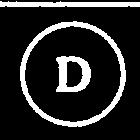

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]
USER ANSWERS [1 2 0 2 4]
GRADING [1 1 1 1 1]
SCORE 100.0


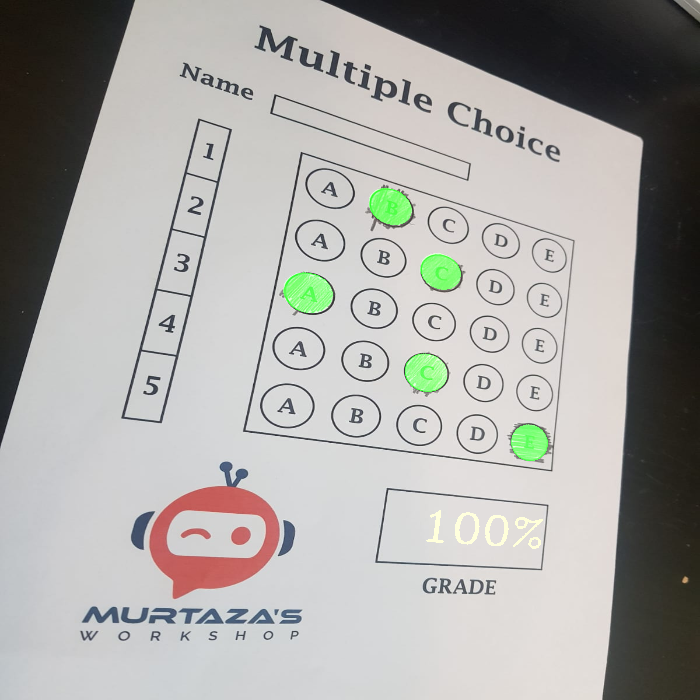

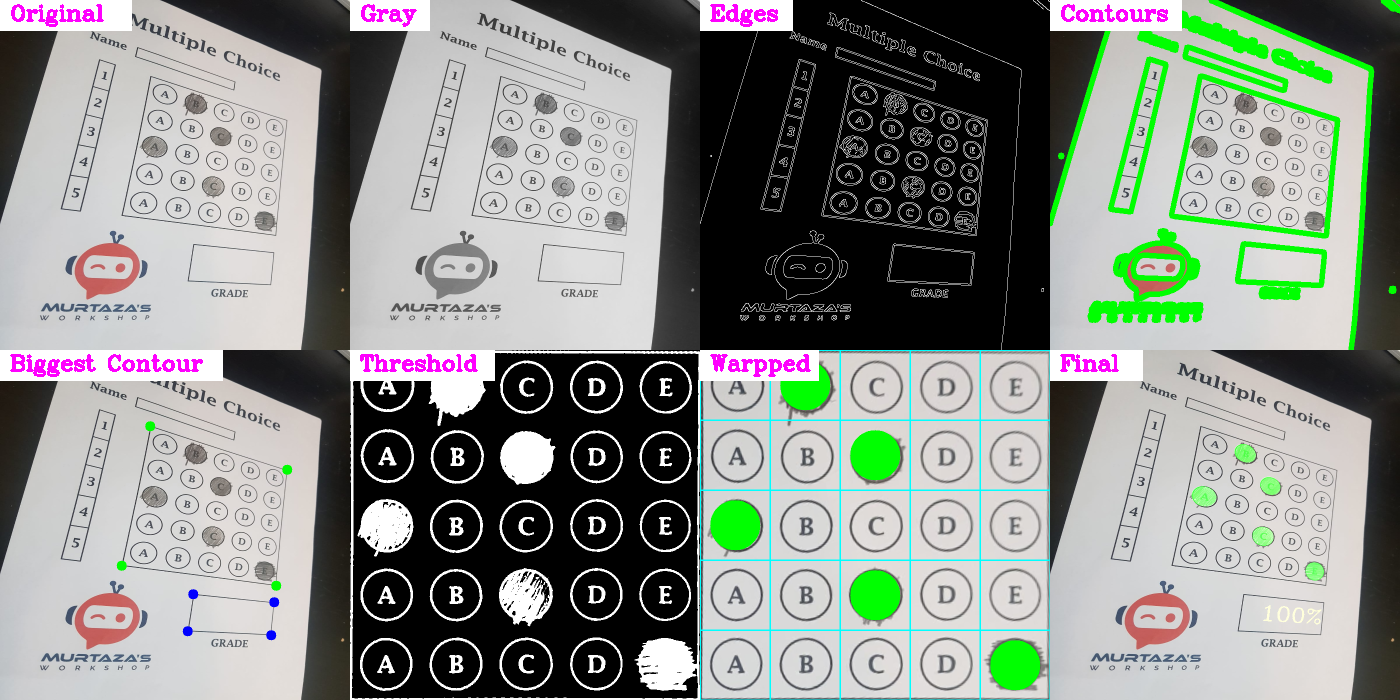

In [ ]:
    import numpy as np
    import cv2
    from google.colab.patches import cv2_imshow # Import the necessary function for image display in Colab
    import utlis
    ########################################################################
    webCamFeed = True
    pathImage = "/content/2.jpg"
    cap = cv2.VideoCapture(1)
    cap.set(10,160)
    heightImg = 700
    widthImg  = 700
    questions=5
    choices=5
    model_path = '/content/drive/MyDrive/image processing/best_model.keras'
    ans= [1,2,0,2,4]
    ########################################################################
    img = cv2.imread(pathImage)
    img = cv2.resize(img, (widthImg, heightImg)) # RESIZE IMAGE
    imgFinal = img.copy()
    imgBlank = np.zeros((heightImg,widthImg, 3), np.uint8) # CREATE A BLANK IMAGE FOR TESTING DEBUGGING IF REQUIRED
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
    imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR
    imgCanny = cv2.Canny(imgBlur,10,70) # APPLY CANNY


        ## FIND ALL COUNTOURS
    imgContours = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
    imgBigContour = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
    contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # FIND ALL CONTOURS
    cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS
    rectCon = utlis.rectContour(contours) # FILTER FOR RECTANGLE CONTOURS
    biggestPoints= utlis.getCornerPoints(rectCon[0]) # GET CORNER POINTS OF THE BIGGEST RECTANGLE
    gradePoints = utlis.getCornerPoints(rectCon[1]) # GET CORNER POINTS OF THE SECOND BIGGEST RECTANGLE


    if biggestPoints.size != 0 and gradePoints.size != 0:

            # BIGGEST RECTANGLE WARPING
            biggestPoints=utlis.reorder(biggestPoints) # REORDER FOR WARPING
            cv2.drawContours(imgBigContour, biggestPoints, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
            pts1 = np.float32(biggestPoints) # PREPARE POINTS FOR WARP
            pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
            matrix = cv2.getPerspectiveTransform(pts1, pts2) # GET TRANSFORMATION MATRIX
            imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg)) # APPLY WARP PERSPECTIVE

            # SECOND BIGGEST RECTANGLE WARPING
            cv2.drawContours(imgBigContour, gradePoints, -1, (255, 0, 0), 20) # DRAW THE BIGGEST CONTOUR
            gradePoints = utlis.reorder(gradePoints) # REORDER FOR WARPING
            ptsG1 = np.float32(gradePoints)  # PREPARE POINTS FOR WARP
            ptsG2 = np.float32([[0, 0], [325, 0], [0, 150], [325, 150]])  # PREPARE POINTS FOR WARP
            matrixG = cv2.getPerspectiveTransform(ptsG1, ptsG2)# GET TRANSFORMATION MATRIX
            imgGradeDisplay = cv2.warpPerspective(img, matrixG, (325, 150)) # APPLY WARP PERSPECTIVE

            # APPLY THRESHOLD
            imgWarpGray = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY) # CONVERT TO GRAYSCALE
            imgThresh = cv2.threshold(imgWarpGray, 170, 255,cv2.THRESH_BINARY_INV )[1] # APPLY THRESHOLD AND INVERSE

            boxes = utlis.splitBoxes(imgThresh) # GET INDIVIDUAL BOXES
            cv2_imshow( boxes[3])
            myPixelVal = np.zeros((questions, choices), dtype=int)
            countR = 0
            countC = 0
            # Use for instead of map so that we can use cv2_imshow function
            for image in boxes:
                #cv2_imshow(image) # Commented out because its only used for debug
                filled_not = classify_image(image, model_path)
                #print(f"Classification result: {filled_not}") # Commented out because its only used for debug
                myPixelVal[countR][countC] = filled_not
                countC += 1
                if (countC == choices):
                    countC = 0
                    countR += 1
            print(myPixelVal)

            # Vectorize the logic for finding user answers
            myIndex = np.argmax(myPixelVal, axis=1)
            print("USER ANSWERS", myIndex)

            # Vectorize the logic for validating the answers
            grading = np.equal(ans, myIndex).astype(int)
            print("GRADING", grading)
            score = (np.sum(grading) / questions) * 100  # FIND THE SCORE
            print("SCORE", score)

            # DISPLAYING ANSWERS
            utlis.showAnswers(imgWarpColored,myIndex,grading,ans) # DRAW DETECTED ANSWERS
            utlis.drawGrid(imgWarpColored) # DRAW GRID
            imgRawDrawings = np.zeros_like(imgWarpColored) # NEW BLANK IMAGE WITH WARP IMAGE SIZE
            utlis.showAnswers(imgRawDrawings, myIndex, grading, ans) # DRAW ON NEW IMAGE
            invMatrix = cv2.getPerspectiveTransform(pts2, pts1) # INVERSE TRANSFORMATION MATRIX
            imgInvWarp = cv2.warpPerspective(imgRawDrawings, invMatrix, (widthImg, heightImg)) # INV IMAGE WARP

            # DISPLAY GRADE
            imgRawGrade = np.zeros_like(imgGradeDisplay,np.uint8) # NEW BLANK IMAGE WITH GRADE AREA SIZE
            cv2.putText(imgRawGrade,str(int(score))+"%",(70,100)
                        ,cv2.FONT_HERSHEY_COMPLEX,3,(0,255,255),3) # ADD THE GRADE TO NEW IMAGE
            invMatrixG = cv2.getPerspectiveTransform(ptsG2, ptsG1) # INVERSE TRANSFORMATION MATRIX
            imgInvGradeDisplay = cv2.warpPerspective(imgRawGrade, invMatrixG, (widthImg, heightImg)) # INV IMAGE WARP

            # SHOW ANSWERS AND GRADE ON FINAL IMAGE
            imgFinal = cv2.addWeighted(imgFinal, 1, imgInvWarp, 1,0)
            imgFinal = cv2.addWeighted(imgFinal, 1, imgInvGradeDisplay, 1,0)

            # IMAGE ARRAY FOR DISPLAY
            imageArray = ([img,imgGray,imgCanny,imgContours],
                          [imgBigContour,imgThresh,imgWarpColored,imgFinal])
            cv2_imshow( imgFinal)


    # LABELS FOR DISPLAY
    lables = [["Original","Gray","Edges","Contours"],
              ["Biggest Contour","Threshold","Warpped","Final"]]

    stackedImage = utlis.stackImages(imageArray,0.5,lables)
    cv2_imshow(stackedImage)

    # SAVE IMAGE WHEN 's' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.imwrite("Scanned/myImage"+str(count)+".jpg",imgFinal)
        cv2.rectangle(stackedImage, ((int(stackedImage.shape[1] / 2) - 230), int(stackedImage.shape[0] / 2) + 50),
                      (1100, 350), (0, 255, 0), cv2.FILLED)
        cv2.putText(stackedImage, "Scan Saved", (int(stackedImage.shape[1] / 2) - 200, int(stackedImage.shape[0] / 2)),
                    cv2.FONT_HERSHEY_DUPLEX, 3, (0, 0, 255), 5, cv2.LINE_AA)
        cv2_imshow( stackedImage)
        cv2.waitKey(300)
        count += 1

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # Import the necessary function for image display in Colab
import utlis
########################################################################
webCamFeed = True
pathImage = "/content/1.jpg"
cap = cv2.VideoCapture(1)
cap.set(10,160)
heightImg = 800
widthImg  = 800
questions=5
choices=5
model_path = '/content/best_model.keras' # Replace with the path to your model
ans= [1,2,0,2,4]
########################################################################
img = cv2.imread(pathImage)
height, width = img.shape[:2]
#img=img[int(height*0.45):, :]
# Preprocessing
img = cv2.resize(img, (widthImg, heightImg))
imgCountours = img.copy()
imgFinal = img.copy()
imgBigContour = img.copy()
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1)
imgCanny = cv2.Canny(imgBlur, 10, 70)
imgBlank = np.zeros_like(img)

## FIND ALL COUNTOURS
contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(imgCountours, contours, -1, (255, 0, 0), 3)
rectCon = utlis.rectContour(contours) # FILTER FOR RECTANGLE CONTOURS
biggestContour = utlis.getCornerPoints(rectCon[0])
biggestPoints= utlis.getCornerPoints(rectCon[0]) # GET CORNER POINTS OF THE BIGGEST RECTANGLE


[[267 127]
 [198 421]
 [687 463]
 [675 168]]
[ 394  619 1150  843]
2


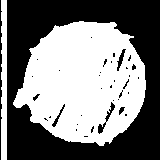

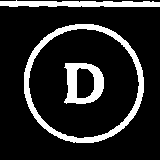

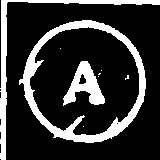

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Classification result: 0


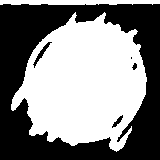

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Classification result: 1


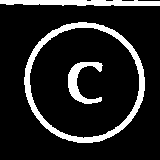

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Classification result: 0


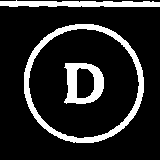

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Classification result: 0


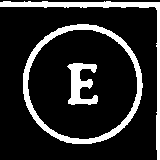

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Classification result: 0


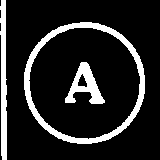

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Classification result: 0


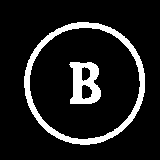

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Classification result: 0


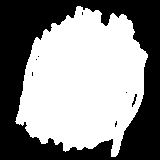

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Classification result: 1


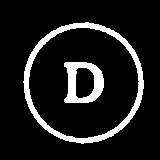

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Classification result: 0


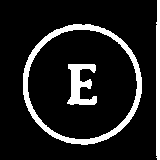

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Classification result: 0


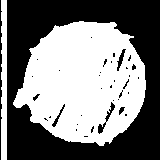

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Classification result: 1


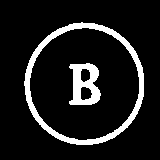

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Classification result: 0


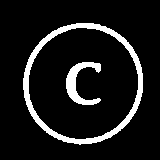

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Classification result: 0


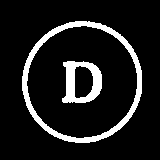

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Classification result: 0


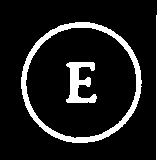

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Classification result: 0


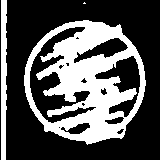

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Classification result: 1


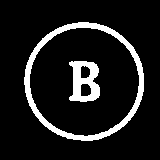

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Classification result: 0


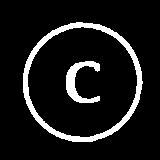

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Classification result: 0


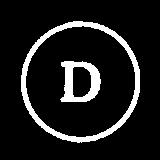

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Classification result: 0


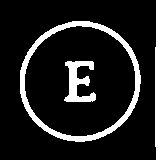

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Classification result: 0


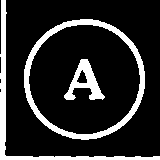

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Classification result: 0


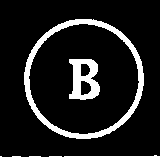

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Classification result: 0


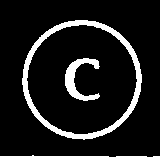

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Classification result: 0


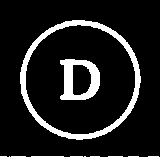

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Classification result: 0


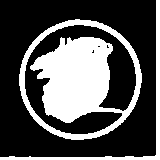

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Classification result: 1
[[0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]]
USER ANSWERS [1 2 0 0 4]
GRADING [1 1 1 0 1]
SCORE 80.0


In [ ]:
if biggestPoints.size != 0 :

  # BIGGEST RECTANGLE WARPING
  biggestPoints=utlis.reorder(biggestContour) # REORDER FOR WARPING
  cv2.drawContours(imgBigContour, biggestPoints, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
  pts1 = np.float32(biggestPoints) # PREPARE POINTS FOR WARP
  pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
  matrix = cv2.getPerspectiveTransform(pts1, pts2) # GET TRANSFORMATION MATRIX
  imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg)) # APPLY WARP PERSPECTIVE
  # APPLY THRESHOLD
  imgWarpGray = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY) # CONVERT TO GRAYSCALE
  imgThresh = cv2.threshold(imgWarpGray, 170, 255,cv2.THRESH_BINARY_INV )[1] # APPLY THRESHOLD AND INVERSE


  boxes = utlis.splitBoxes(imgThresh) # GET INDIVIDUAL BOXES

  cv2_imshow(boxes[10]) # Use cv2_imshow instead of cv2.imshow
  cv2_imshow( boxes[3])
  countR=0
  countC=0
  # Assuming you have the 'boxes' array after splitting the image

  boxes = utlis.splitBoxes(imgThresh) # GET INDIVIDUAL BOXES
  myPixelVal = np.zeros((questions, choices), dtype=int)
  countR = 0
  countC = 0
  # Use for instead of map so that we can use cv2_imshow function
  for image in boxes:
      cv2_imshow(image) # Commented out because its only used for debug
      filled_not = classify_image(image, model_path)
      print(f"Classification result: {filled_not}") # Commented out because its only used for debug
      myPixelVal[countR][countC] = filled_not
      countC += 1
      if (countC == choices):
          countC = 0
          countR += 1
  print(myPixelVal)

  # Vectorize the logic for finding user answers
  myIndex = np.argmax(myPixelVal, axis=1)
  print("USER ANSWERS", myIndex)

  # Vectorize the logic for validating the answers
  grading = np.equal(ans, myIndex).astype(int)
  print("GRADING", grading)
  score = (np.sum(grading) / questions) * 100  # FIND THE SCORE
  print("SCORE", score)


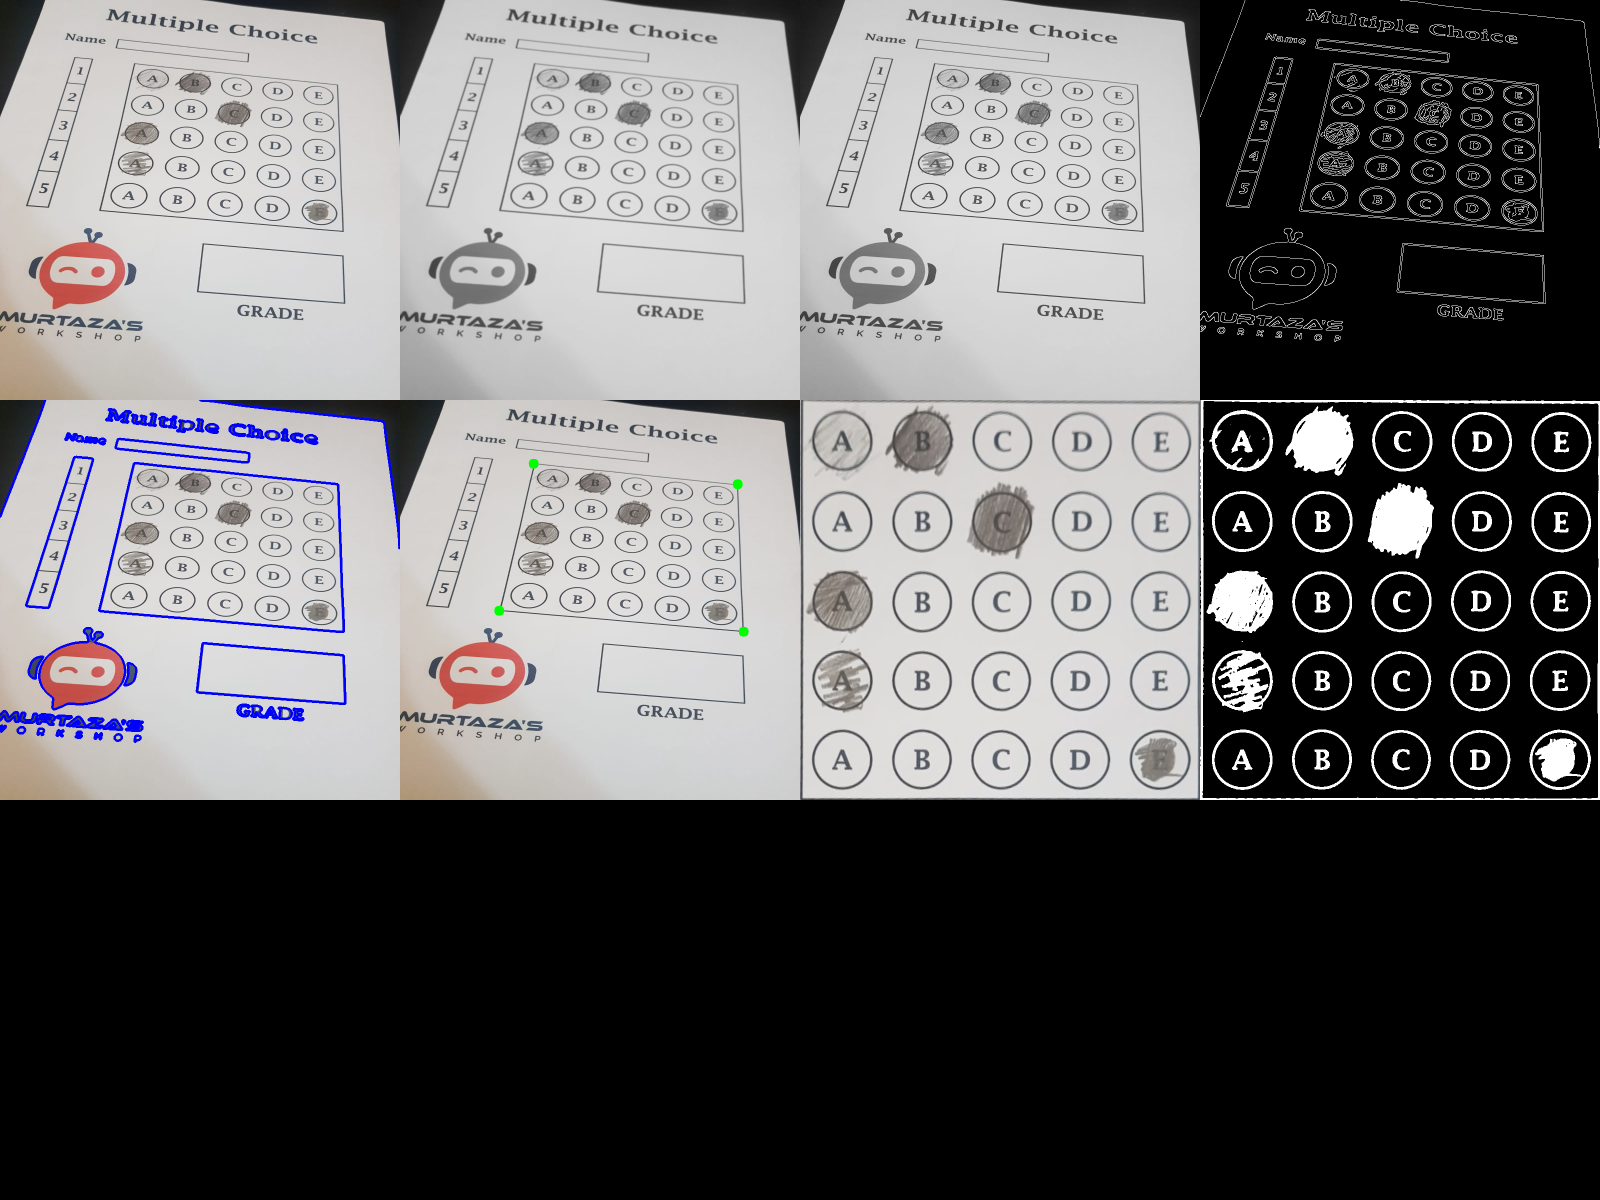

-1

In [ ]:
imageArray = ([img, imgBlur,imgGray,imgCanny],
 [imgCountours,imgBigContour,imgWarpColored,imgThresh],
              [imgBlank,imgBlank,imgBlank,imgBlank])
stackedImage = utlis.stackImages(imageArray, 0.5)
cv2_imshow(stackedImage) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model
def create_model(image_size=(256, 256), num_classes=2):
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation='softmax')
        ])
        return model
# Create a simple CNN model
model = create_model()

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks for model saving and early stopping
checkpoint = ModelCheckpoint('best_model.keras', # Changed .h5 to .keras
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min')

# Training parameters
epochs = 20
batch_size = 16

# Load the data
data_dir = "/content/drive/MyDrive/image processing/omr_data"
image_size = (256, 256)

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)


# Split the dataset
def split_dataset(dataset, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):

    if train_ratio + val_ratio + test_ratio != 1.0:
         raise ValueError("The sum of train, val, and test ratios must be 1.0")

    dataset_size = len(dataset)
    train_size = int(train_ratio * dataset_size)
    val_size = int(val_ratio * dataset_size)
    test_size = dataset_size - train_size - val_size


    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size).take(test_size)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = split_dataset(dataset, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1)

# Apply caching to all datasets:
train_ds = train_ds.cache()
val_ds = val_ds.cache()
test_ds = test_ds.cache()


def augment_image(image, label):

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.3)
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)

    return image, label

# Apply data augmentation to the training dataset
train_ds = train_ds.map(augment_image)


# Train the model
history = model.fit(train_ds,
                      validation_data=val_ds,
                      epochs=epochs,
                      batch_size = batch_size,
                      callbacks=[checkpoint])

# Load the best model
best_model = tf.keras.models.load_model('best_model.keras') # Changed .h5 to .keras

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(test_ds)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 151 files belonging to 2 classes.
Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.5759 - loss: 854.2443 - val_accuracy: 0.8750 - val_loss: 1.4619
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7635 - loss: 2.7091 - val_accuracy: 0.8750 - val_loss: 0.0898
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8877 - loss: 0.2426 - val_accuracy: 0.9375 - val_loss: 0.0753
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9596 - loss: 0.1298 - val_accuracy: 1.0000 - val_loss: 0.0723
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9496 - loss: 0.1366 - val_accuracy: 1.0000 - val_loss: 0.0791
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9508 - loss: 0.1614 - val_accuracy: 1.0000 - val_loss: 0.0644
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9913 - loss: 0.1065 - val_accuracy: 1.0000 - val_loss: 0.0553
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9485 - loss: 0.1390 - val_ac

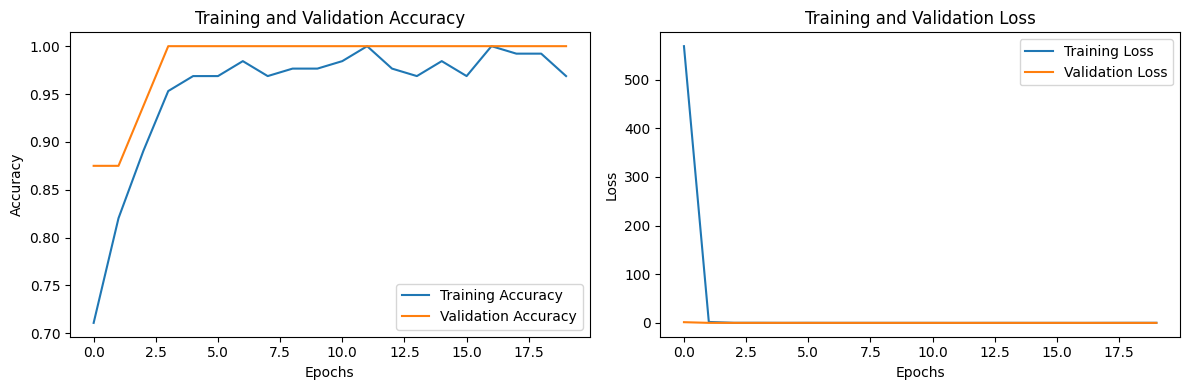

In [ ]:
import matplotlib.pyplot as plt
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


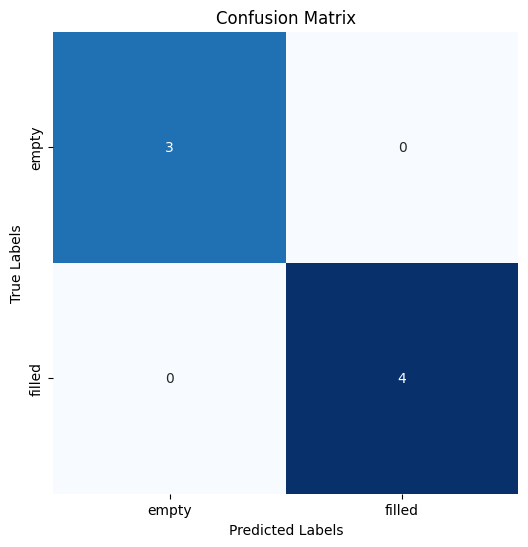

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,517,704 (169.82 MB)

 Trainable params: 14,839,234 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,678,470 (113.21 MB)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_true = []
y_pred = []
for images, labels in test_ds:
  predictions = best_model.predict(images)
  predictions = np.argmax(predictions, axis=1)
  y_true.extend(labels.numpy())
  y_pred.extend(predictions)

y_true = np.array(y_true)
y_pred = np.array(y_pred)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
          xticklabels=['empty','filled'],
          yticklabels=['empty','filled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
model.summary()

In [ ]:
import tensorflow as tf
import numpy as np

def classify_image(image, model_path, target_size=(256, 256)):


    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Add channels dimension if needed
    if len(image.shape) == 2:
      image = np.expand_dims(image, axis=-1)  # Make it (H, W, 1)

    # Convert to 3 channels if needed
    if image.shape[-1] != 3:
        image = np.concatenate([image, image, image], axis=-1)  # Make it (H, W, 3)

    # Resize the image
    img = tf.image.resize(image, target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class of the image
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    return class_index

In [ ]:
import tensorflow as tf
import numpy as np
def classify_image(image_path, model_path, target_size=(256, 256)):

    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Load and preprocess the image
    img = tf.keras.utils.load_img(image_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension

    # Predict the class of the image
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    return class_index

# Example of usage:
if __name__ == '__main__':
  image_path = '/content/drive/MyDrive/image processing/omr_data/empty/box_21.png'  # Replace with the path to your test image
  model_path = 'best_model.keras' # Replace with the path to your model

  result = classify_image(image_path, model_path)
  print(f"Classification result: {result}") # Returns 0 or 1

  image_path = '/content/drive/MyDrive/image processing/omr_data/filled/box_18.png'  # Replace with the path to your test image
  result = classify_image(image_path, model_path)
  print(f"Classification result: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Classification result: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Classification result: 1


In [ ]:
import os

output_folder = "/content/boxes2"
os.makedirs(output_folder, exist_ok=True)
if biggestPoints.size != 0:
    # BIGGEST RECTANGLE WARPING
    biggestPoints = utlis.reorder(biggestContour)  # REORDER FOR WARPING
    cv2.drawContours(imgBigContour, biggestPoints, -1, (0, 255, 0), 20)  # DRAW THE BIGGEST CONTOUR
    pts1 = np.float32(biggestPoints)  # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0], [widthImg, 0], [0, heightImg], [widthImg, heightImg]])  # PREPARE POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2)  # GET TRANSFORMATION MATRIX
    imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))  # APPLY WARP PERSPECTIVE

    # APPLY THRESHOLD
    imgWarpGray = cv2.cvtColor(imgWarpColored, cv2.COLOR_BGR2GRAY)  # CONVERT TO GRAYSCALE
    imgThresh = cv2.threshold(imgWarpGray, 170, 255, cv2.THRESH_BINARY_INV)[1]  # APPLY THRESHOLD AND INVERSE

    boxes = utlis.splitBoxes(imgThresh)  # GET INDIVIDUAL BOXES

    # حفظ كل مربع داخل الفولدر
    for i, box in enumerate(boxes):
        file_path = os.path.join(output_folder, f"box_{i + 25}.png")
        cv2.imwrite(file_path, box)
        print(f"Saved box {i + 25} at {file_path}")

    print("All boxes have been saved successfully!")


NameError: name 'biggestContour' is not defined